In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from scipy.optimize import curve_fit

import seaborn as sns
import cycler 

In [2]:
PATH_OUT = "./output"

### 1. Data points

In [3]:
# First generate some random data, and a linear fit
np.random.seed(5)

x = np.random.rand(20)
xerr = 0.01 
yerr = 0.5*np.random.normal(size=x.size)
y = 5*x + 0.5 + yerr

# Some random fit
def fitfunction(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fitfunction, x, y)
yfit = popt[0]*x + popt[1]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


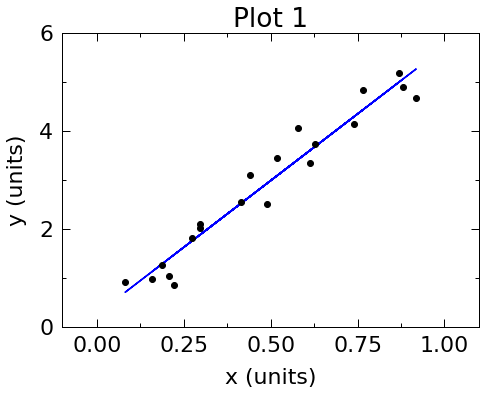

In [4]:
# Single plot without errorbars

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely 

ax.plot(x,yfit,'b-',lw=1.5) # a blue line
ax.plot(x,y,'ko',ms=6) # black circles

# 3. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 1")
ax.set_xlabel("x (units)", labelpad=12)
ax.set_ylabel("y (units)", labelpad=12)

# Axis limits and tick values
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,6)
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_yticks([0,2,4,6])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# 4. Save plot then show
plt.savefig(PATH_OUT+"/plot1.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show();

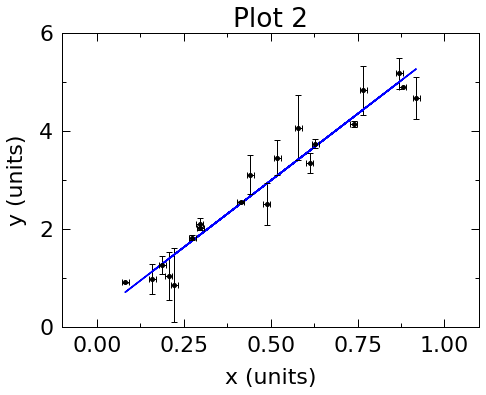

In [5]:
# Single plot with errorbars

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely

ax.plot(x,yfit,'b-',lw=1.5) # a blue line
ax.errorbar(x,y,xerr=xerr,yerr=yerr,
            fmt='ko',ms=4,elinewidth=1,capsize=3,mew=1) # black circles with errorbars

# 3. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 2")
ax.set_xlabel("x (units)", labelpad=12)
ax.set_ylabel("y (units)", labelpad=12)

# Axis limits
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,6)
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_yticks([0,2,4,6])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# 4. Save plot then show
plt.savefig(PATH_OUT+"/plot2.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


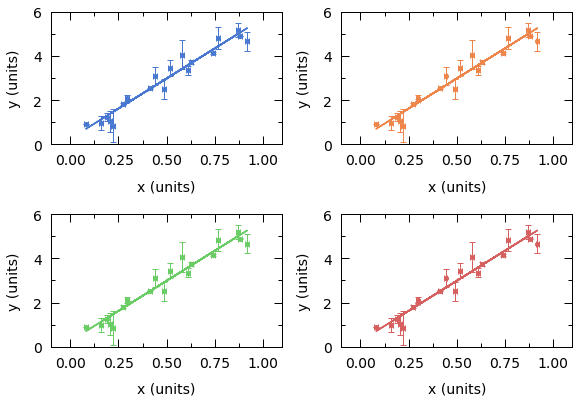

In [6]:
# Subplots with errorbars

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'14','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("muted", 4) # a categorical colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, axarr=plt.subplots(2,2)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely

# get colors
c1 = current_palette[0]
c2 = current_palette[1]
c3 = current_palette[2]
c4 = current_palette[3]

axarr[0,0].plot(x,yfit,'-',lw=1.5,color=c1)
axarr[0,1].plot(x,yfit,'-',lw=1.5,color=c2)
axarr[1,0].plot(x,yfit,'-',lw=1.5,color=c3)
axarr[1,1].plot(x,yfit,'-',lw=1.5,color=c4)

axarr[0,0].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='o',color=c1,ms=4,elinewidth=1,capsize=3,mew=1)
axarr[0,1].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='o',color=c2,ms=4,elinewidth=1,capsize=3,mew=1)
axarr[1,0].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='o',color=c3,ms=4,elinewidth=1,capsize=3,mew=1)
axarr[1,1].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='o',color=c4,ms=4,elinewidth=1,capsize=3,mew=1)

# 4. Format plot - change parameters as required
# For subplots, have to do this for every plot in the array
for ax in [axarr[0,0],axarr[0,1],axarr[1,0],axarr[1,1]]:
    # Title and labels
    # ax.set_title("Plot 3")
    ax.set_xlabel("x (units)", labelpad=12)
    ax.set_ylabel("y (units)", labelpad=12)

    # Axis limits
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(0,6)
    ax.set_xticks([0,0.25,0.5,0.75,1])
    ax.set_yticks([0,2,4,6])

    # Axis and frame linewidths
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1) 

    # Turn on minor ticks
    minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
    minorLocatory=AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)

    # Major and minor ticks
    ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
    ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# 5. Save plot then show
f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
plt.savefig(PATH_OUT+"/plot3.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

### 2. Curves

In [7]:
# Multiple curves

# Some random curves
NUMBEROFCURVES=5
p = np.linspace(0,1,10)
q = np.zeros((p.size,NUMBEROFCURVES))

for j in range(NUMBEROFCURVES):
    q[:,j] = j*p**2

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


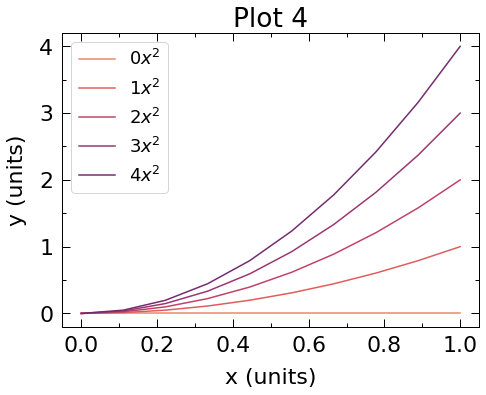

In [8]:
# Single plot with multiple curves

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("flare", NUMBEROFCURVES) # a sequential colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely

for j in range(NUMBEROFCURVES):
    ax.plot(p,q[:,j],'-',lw=1.5,label=str(j)+'$x^2$') # each plot has a label. Dollar signs for LaTeX

# 4. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 4")
ax.set_xlabel("x (units)", labelpad=12)
ax.set_ylabel("y (units)", labelpad=12)

# Axis limits and tick values - here commented out, for auto settings
#ax.set_xlim(-0.1,1.1)
#ax.set_ylim(0,6)
#ax.set_xticks([0,0.25,0.5,0.75,1])
#ax.set_yticks([0,2,4,6])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# Add legend
ax.legend(loc='best',fontsize=18)

# 5. Save plot then show
plt.savefig(PATH_OUT+"/plot4.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

### 3. Bar charts

In [9]:
# Some random data in three categories
NUMBEROFCATS = 3
np.random.seed(5)
a = np.random.rand(6)
b = np.random.rand(6)
c = np.random.rand(6)
aerr = a*0.1
berr = b*0.05
cerr = c*0.2

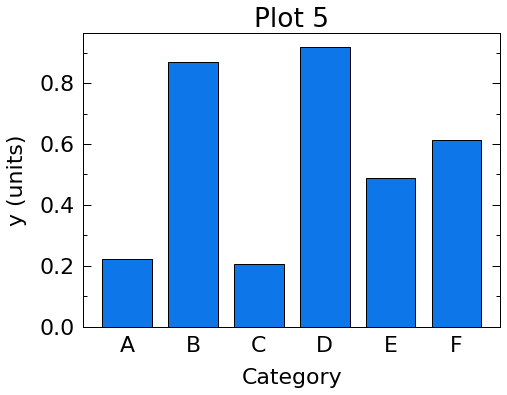

In [10]:
# Single bar chart
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("muted", NUMBEROFCATS) # a categorical colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely 

length = a.shape[0]
indices=np.arange(length)
ax.bar(indices,a,width=0.75,linewidth=1,edgecolor="k",color='#0d76e8',align="center")

# 4. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 5")
ax.set_xlabel("Category", labelpad=12)
ax.set_ylabel("y (units)", labelpad=12)

# Axis limits and tick values
#ax.set_ylim(0,6)
#ax.set_yticks([0,2,4,6])
ax.set_xticks(indices)
ax.set_xticklabels(["A","B","C","D","E","F"])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
#minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
#ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=False,right=True,bottom=False)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=False,right=True,bottom=False)

# 5. Save plot then show
plt.savefig(PATH_OUT+"/plot5.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

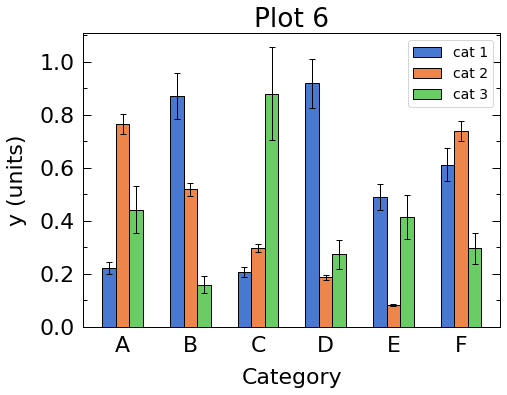

In [11]:
# Single bar chart with multiple categories and errorbars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("muted", NUMBEROFCATS) # a categorical colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely 

length = a.shape[0]
indices=np.arange(length)
ax.bar(indices-0.2,a,width=0.2,yerr=aerr,linewidth=1,edgecolor="k",align="center",
      error_kw=dict(ecolor='k',lw=1,capsize=3,capthick=1),label="cat 1")
ax.bar(indices,b,width=0.2,yerr=berr,linewidth=1,edgecolor="k",align="center",
       error_kw=dict(ecolor='k',lw=1,capsize=3,capthick=1),label="cat 2")
ax.bar(indices+0.2,c,width=0.2,yerr=cerr,linewidth=1,edgecolor="k",align="center",
       error_kw=dict(ecolor='k',lw=1,capsize=3,capthick=1),label="cat 3")

# 4. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 6")
ax.set_xlabel("Category", labelpad=12)
ax.set_ylabel("y (units)", labelpad=12)

# Axis limits and tick values
#ax.set_ylim(0,6)
#ax.set_yticks([0,2,4,6])
ax.set_xticks(indices)
ax.set_xticklabels(["A","B","C","D","E","F"])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
#minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
#ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=False,right=True,bottom=False)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=False,right=True,bottom=False)

# Add legend
ax.legend(loc='best',fontsize=14)

# 5. Save plot then show
plt.savefig(PATH_OUT+"/plot6.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

### 4. Distributions

In [12]:
# Three normal distributions
NUMBEROFCATS = 3
np.random.seed(5)
l = np.random.normal(scale=1.0,size=1000)
m = np.random.normal(scale=2.0,loc=5.0,size=1000)
n = np.random.normal(scale=0.5,loc=3.0,size=1000)

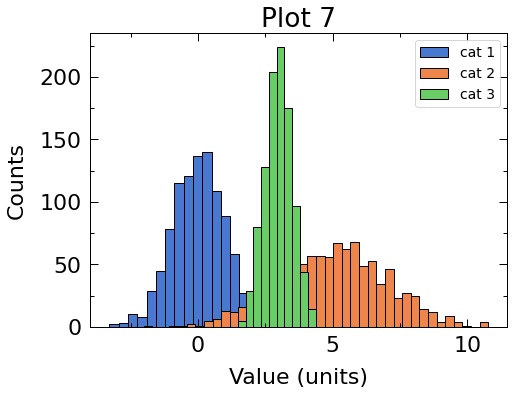

In [13]:
# Histogram
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("muted", NUMBEROFCATS) # a categorical colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely 

ax.hist(l,bins=20,label="cat 1",edgecolor='k') # number of bins rescaled by variance
ax.hist(m,bins=40,label="cat 2",edgecolor='k')
ax.hist(n,bins=10,label="cat 3",edgecolor='k')

# 4. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 7")
ax.set_xlabel("Value (units)", labelpad=12)
ax.set_ylabel("Counts", labelpad=12)

# Axis limits and tick values
#ax.set_ylim(0,6)
#ax.set_yticks([0,2,4,6])
#ax.set_xticks(indices)
#ax.set_xticklabels(["A","B","C","D","E","F"])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# Add legend
ax.legend(loc='best',fontsize=14)

# 5. Save plot then show
plt.savefig(PATH_OUT+"/plot7.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()

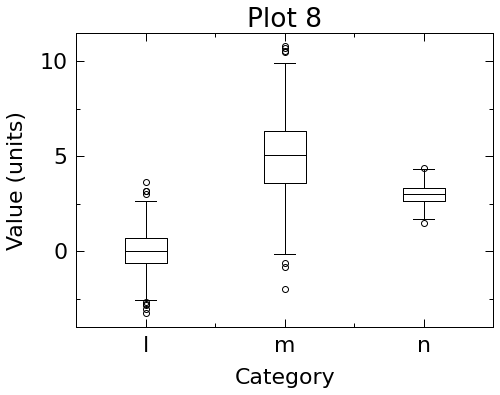

In [14]:
# Box plot
# https://matplotlib.org/stable/gallery/statistics/boxplot.html

# 1. Define global plot parameters
plt.close("all"); DPI=150
figure_options={'figsize':(8.27,5.83)} # figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)

# 2. Set colour palette
current_palette=sns.color_palette("muted", NUMBEROFCATS) # a categorical colour palette
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plot
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.9) # Set size of plot precisely 

ax.boxplot([l,m,n],medianprops=dict(color="k")) # distributions go into list for plotting

# 4. Format plot - change parameters as required
# Title and labels
ax.set_title("Plot 8")
ax.set_xlabel("Category", labelpad=12)
ax.set_ylabel("Value (units)", labelpad=12)

# Axis limits and tick values
#ax.set_ylim(0,6)
#ax.set_yticks([0,2,4,6])
ax.set_xticklabels(["l","m","n"])

# Axis and frame linewidths
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1) 

# Turn on minor ticks
minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
minorLocatory=AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

# Major and minor ticks
ax.tick_params(which='major', width=1, length=8, pad=9,direction='in',top=True,right=True)
ax.tick_params(which='minor', width=1, length=4, pad=9,direction='in',top=True,right=True)

# 5. Save plot then show
plt.savefig(PATH_OUT+"/plot8.pdf",dpi=DPI,transparent=True) # In Jupyter you must save before showing plot
plt.show()